In [2]:
import pandas as pd
df = pd.read_csv('vgsales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df['Genre'].nunique()

12

In [5]:
df['Platform'].nunique()

31

In [20]:
df = df.dropna()

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plat_genre(df, genre):
    platgenre = pd.DataFrame(df[df.Genre == genre].groupby('Platform').Rank.count())
    platgenre = platgenre.rename(columns={'Rank': 'Count'})
    
    x = np.arange(len(platgenre.Count))
    plt.figure(figsize=(22, 6))
    sns.barplot(x=platgenre.index, y=platgenre.Count)
    plt.title("Number of games for genre '" + genre + "'")
    plt.show()

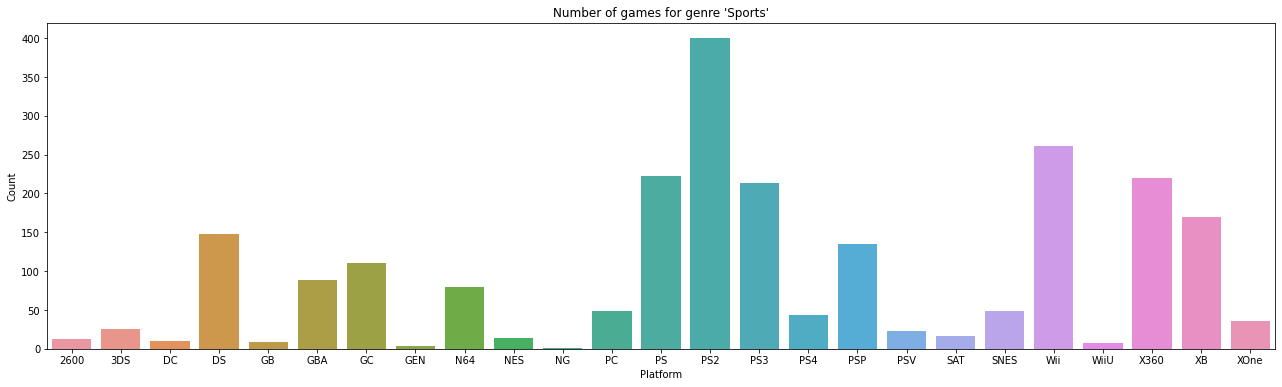

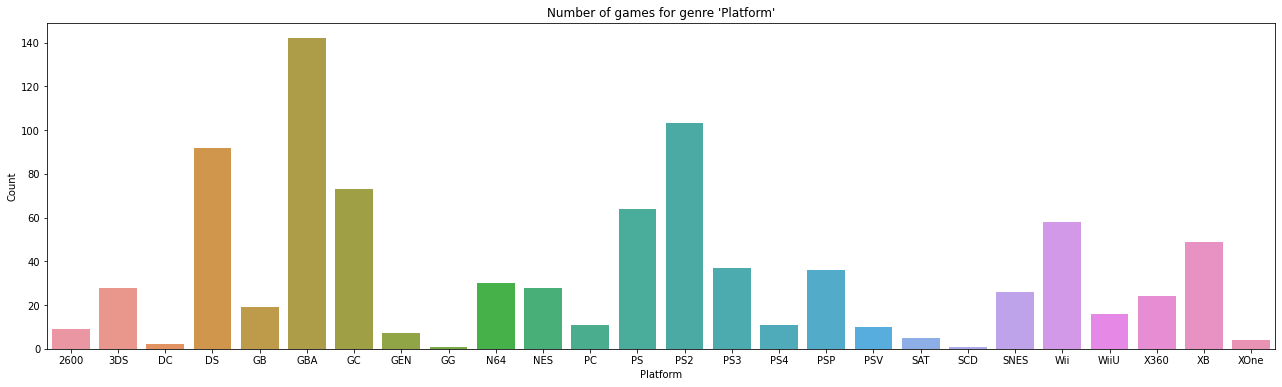

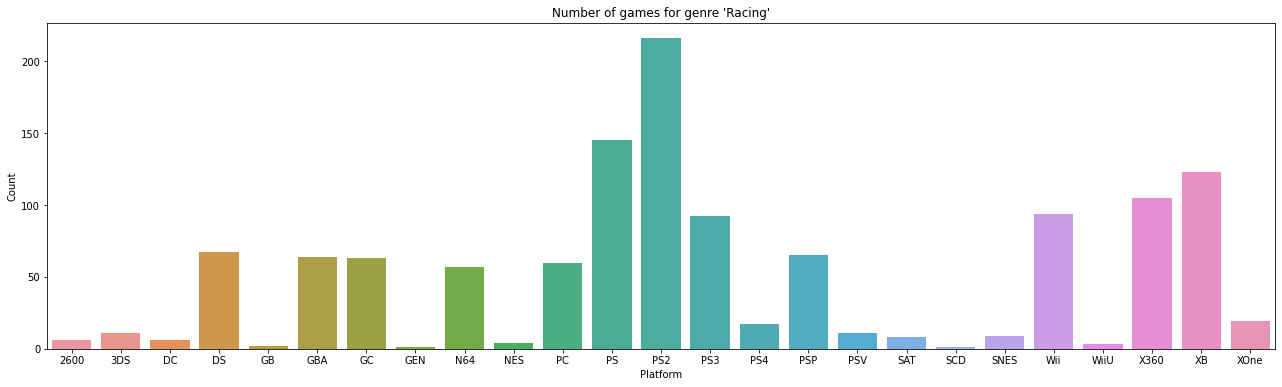

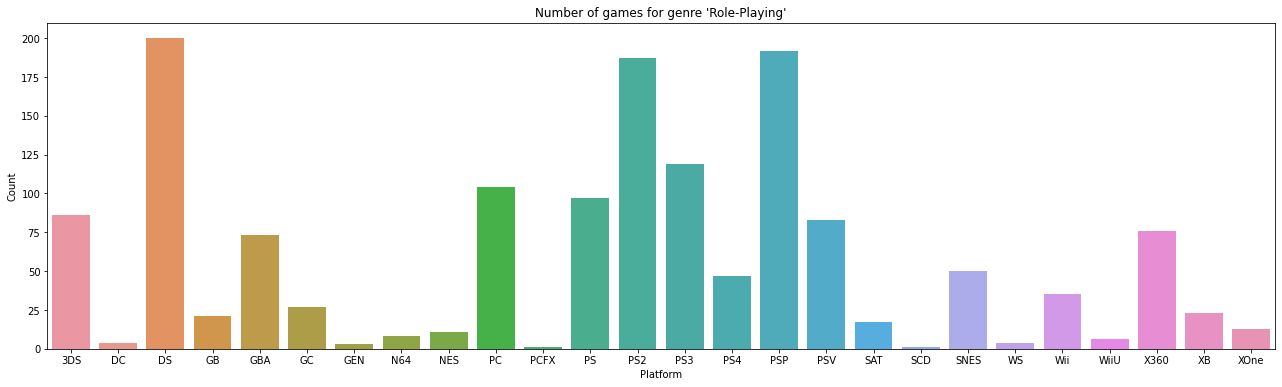

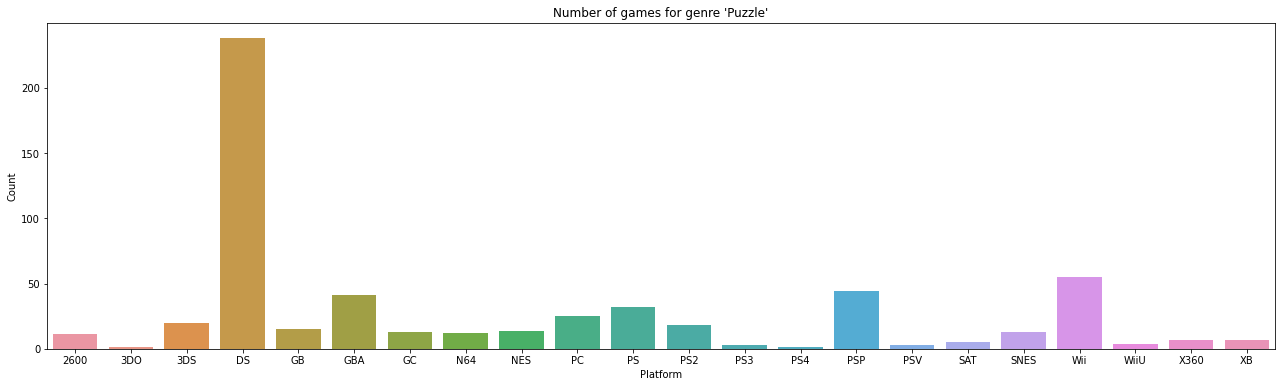

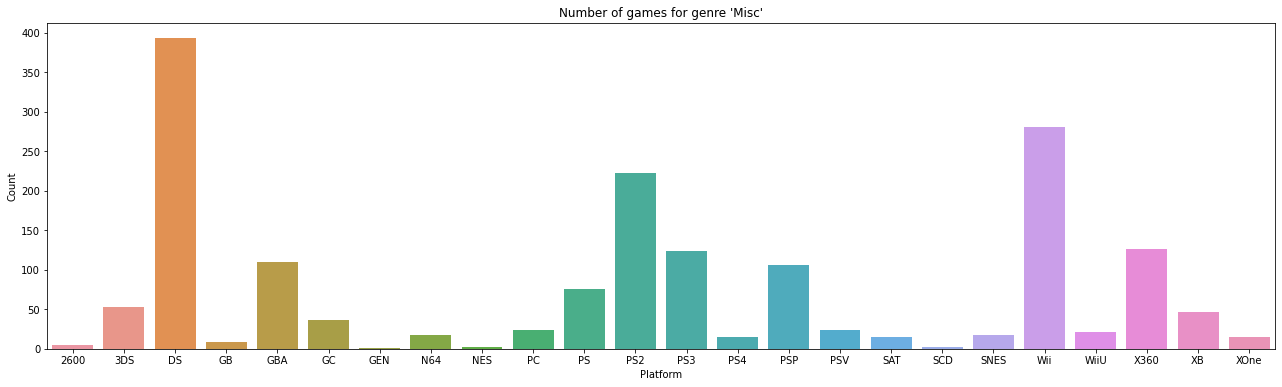

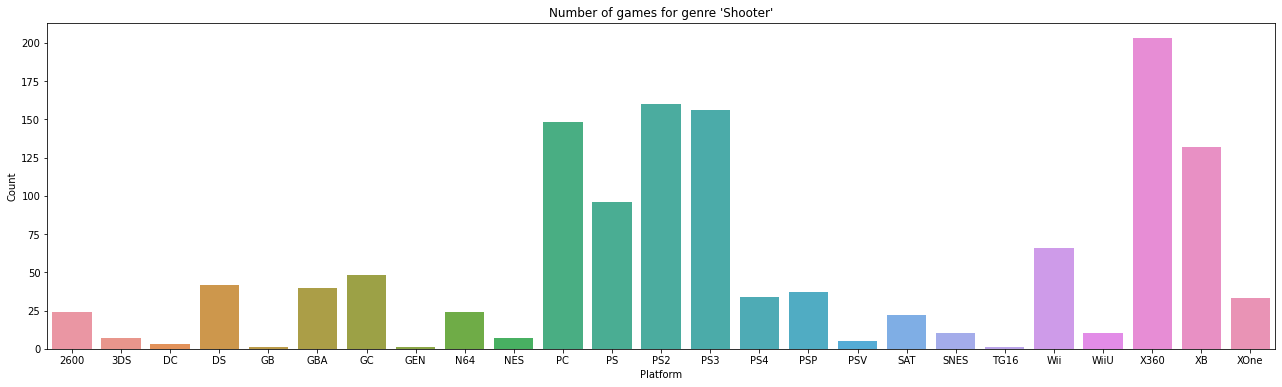

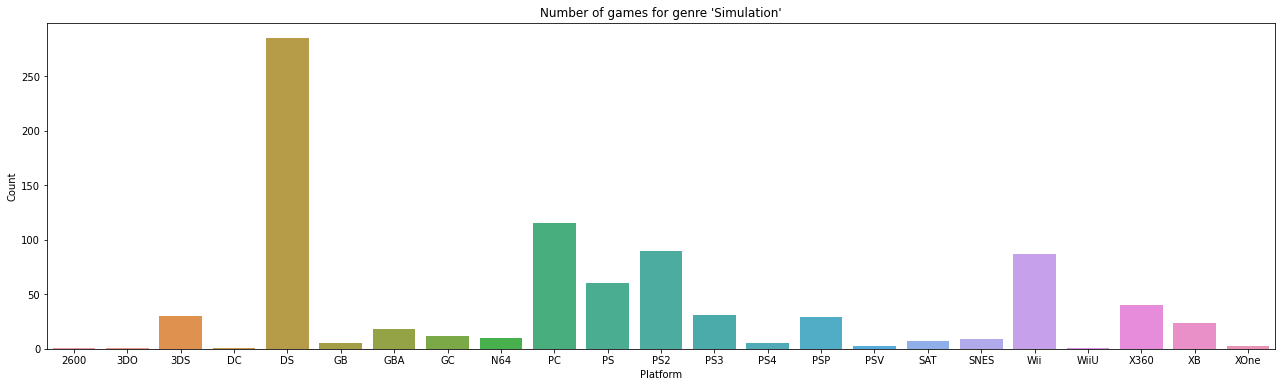

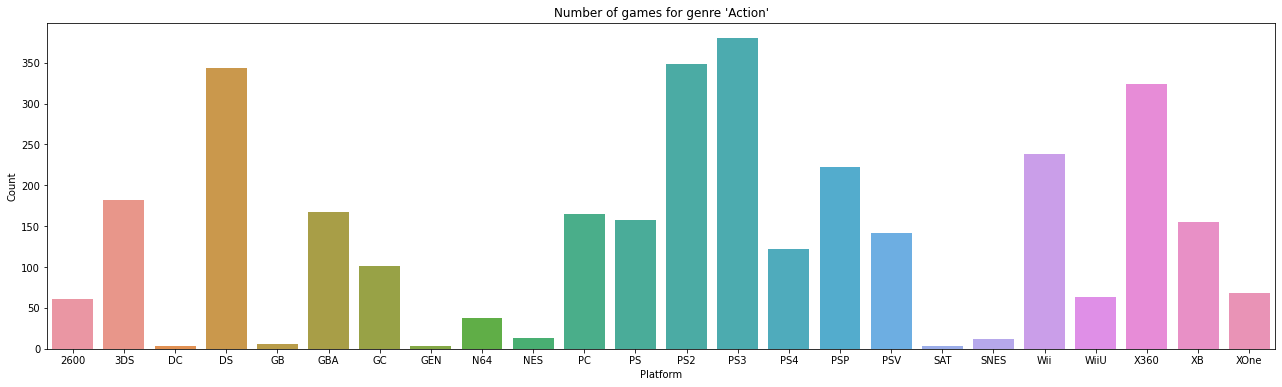

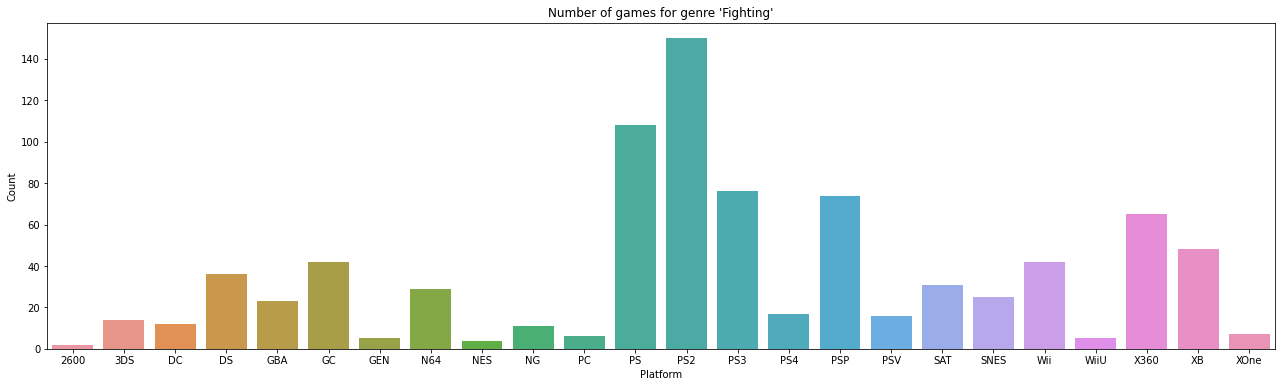

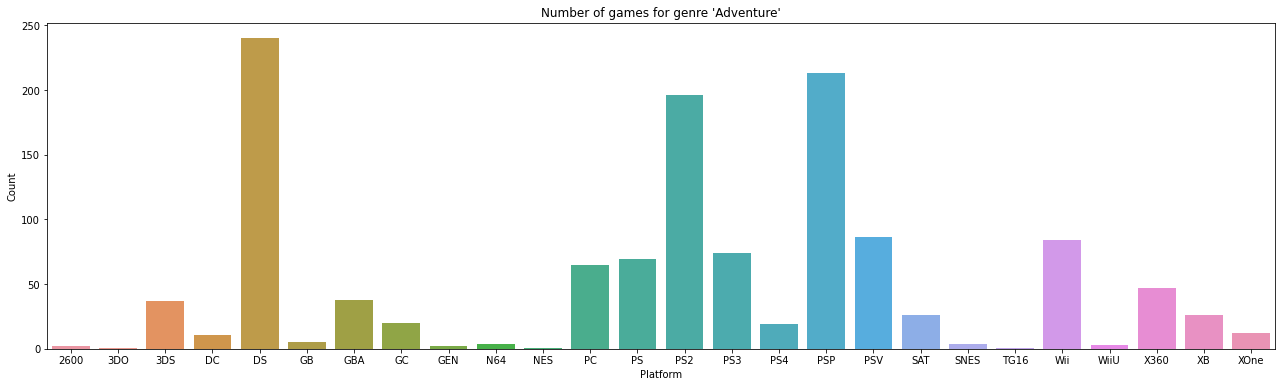

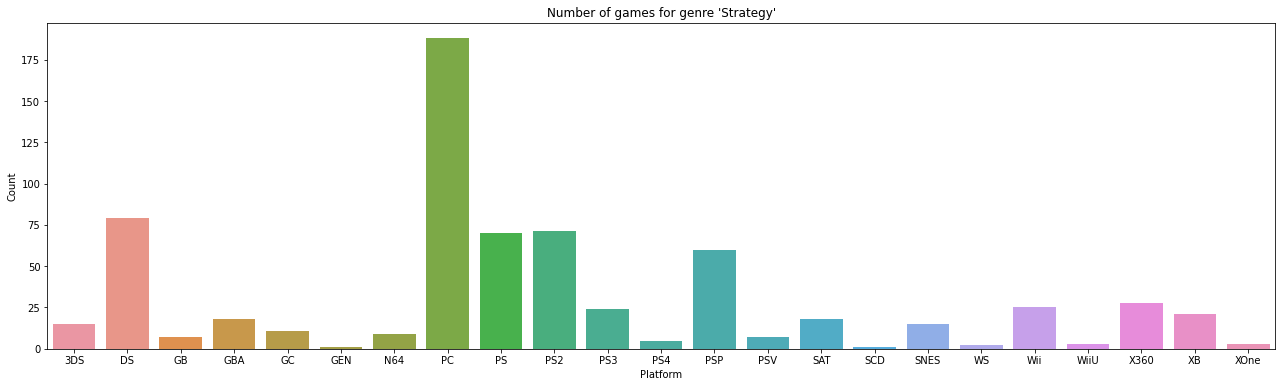

In [8]:
for genre in df.Genre.unique():
    plat_genre(df, genre)

# Check part des ventes par genre pour chaque plateforme

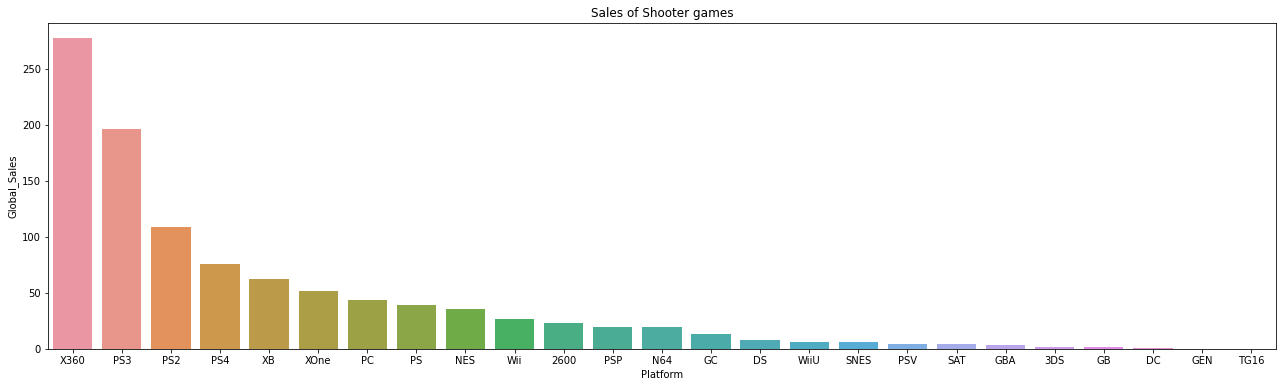

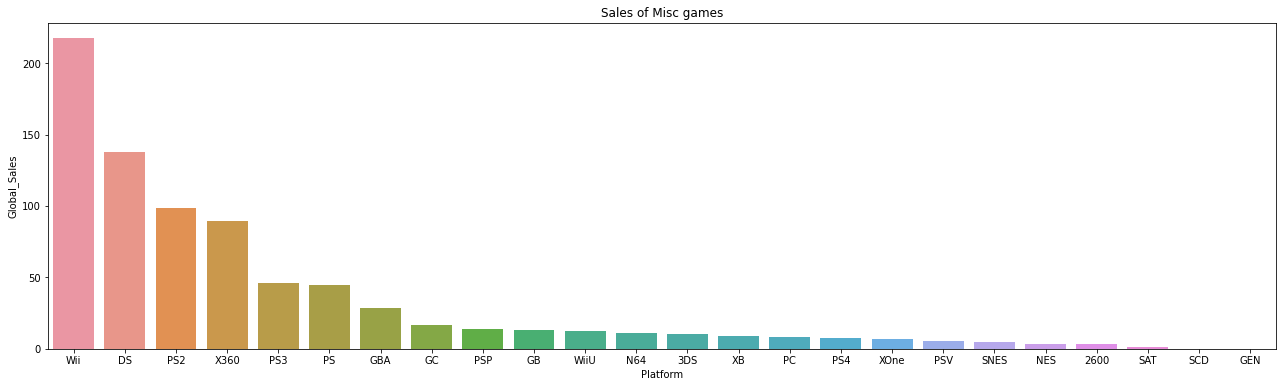

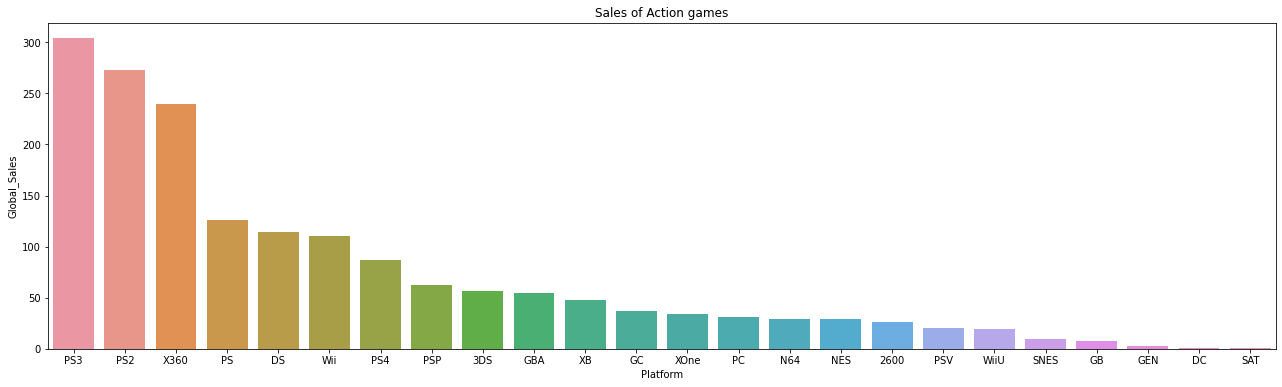

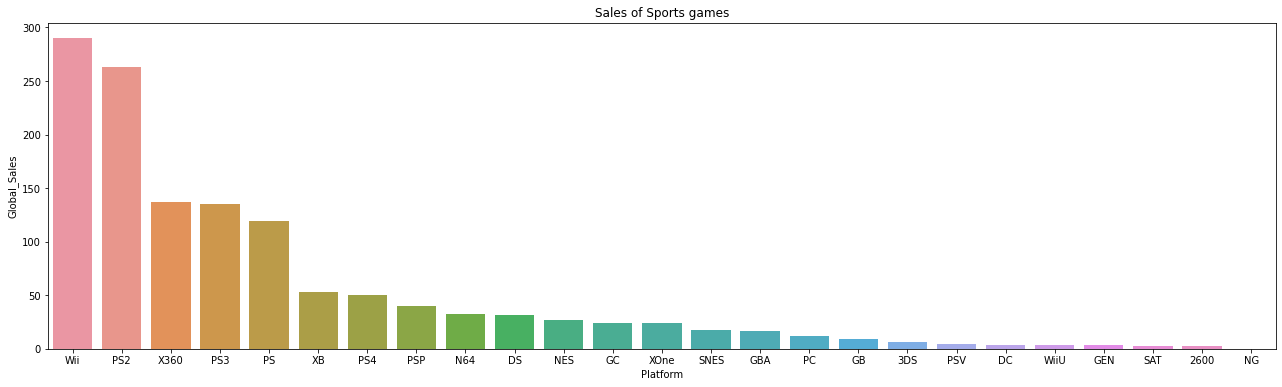

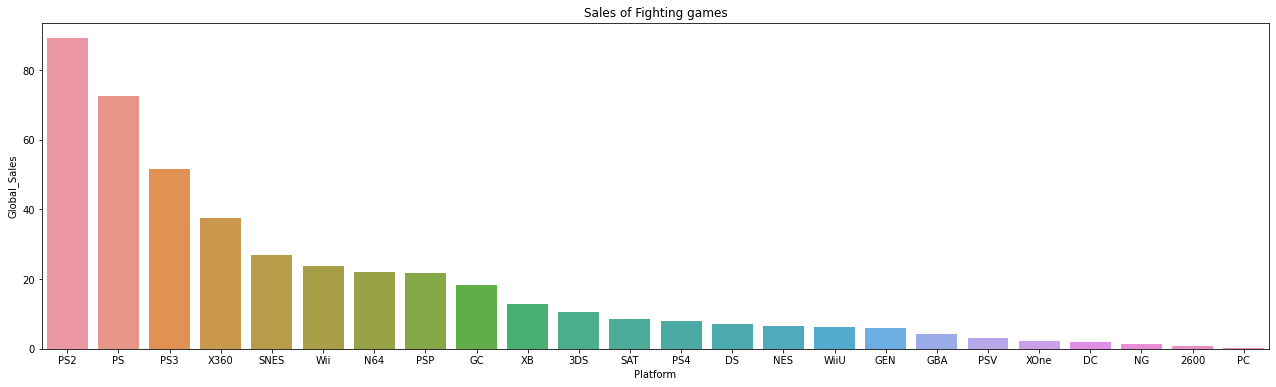

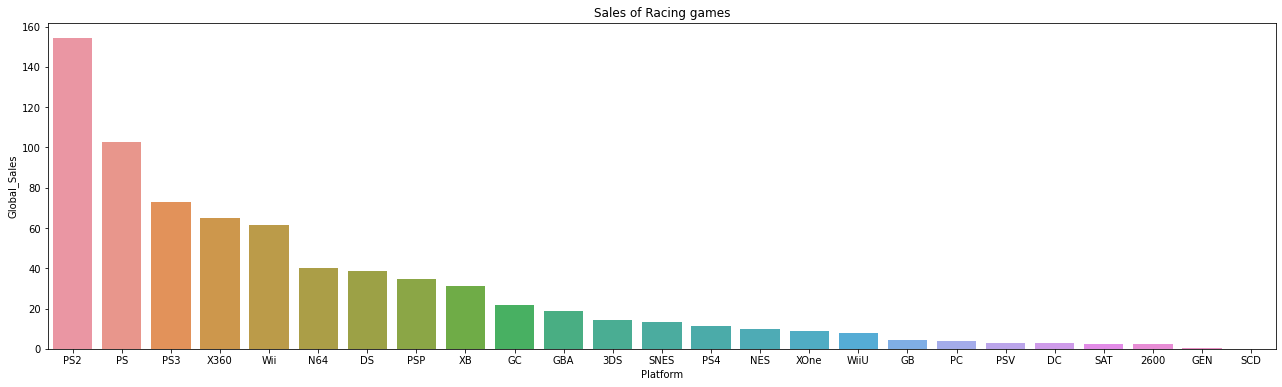

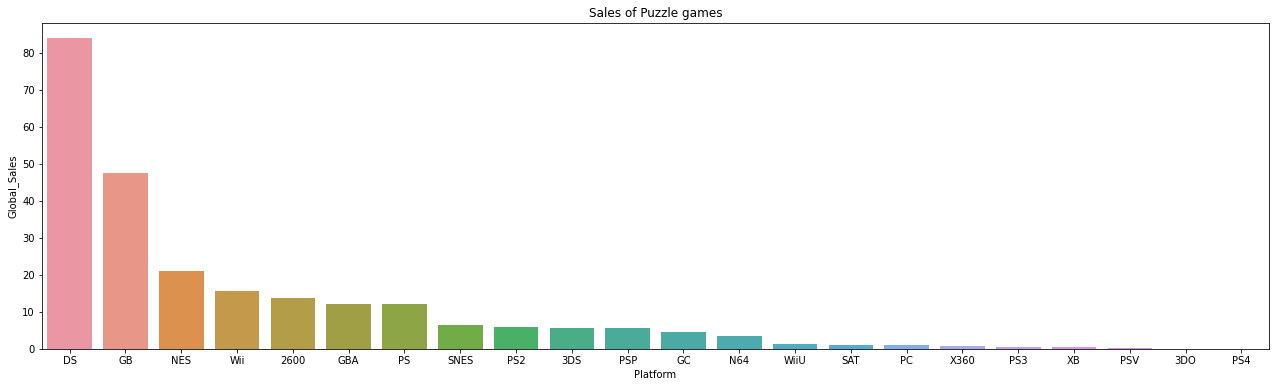

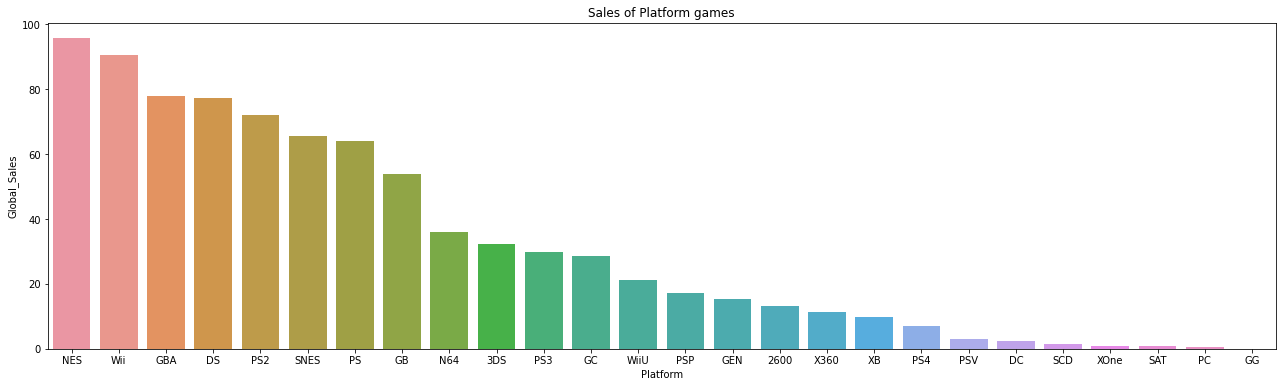

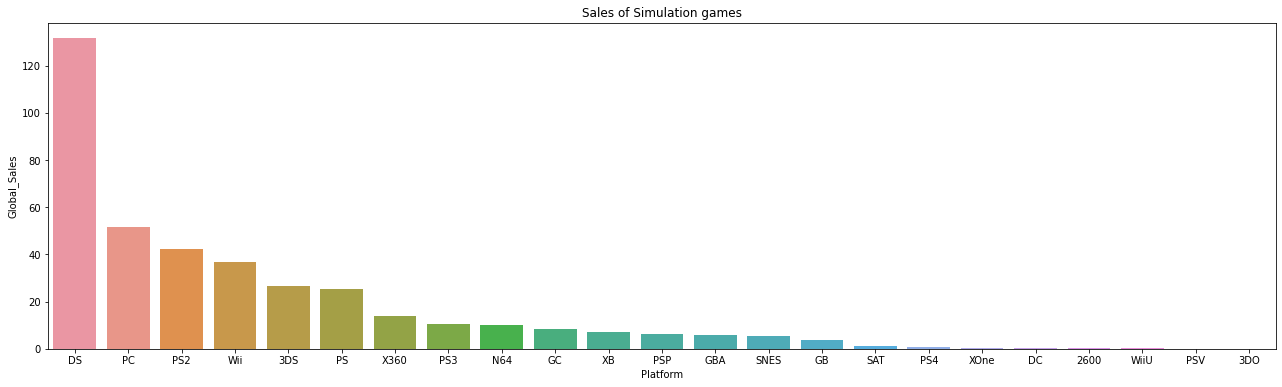

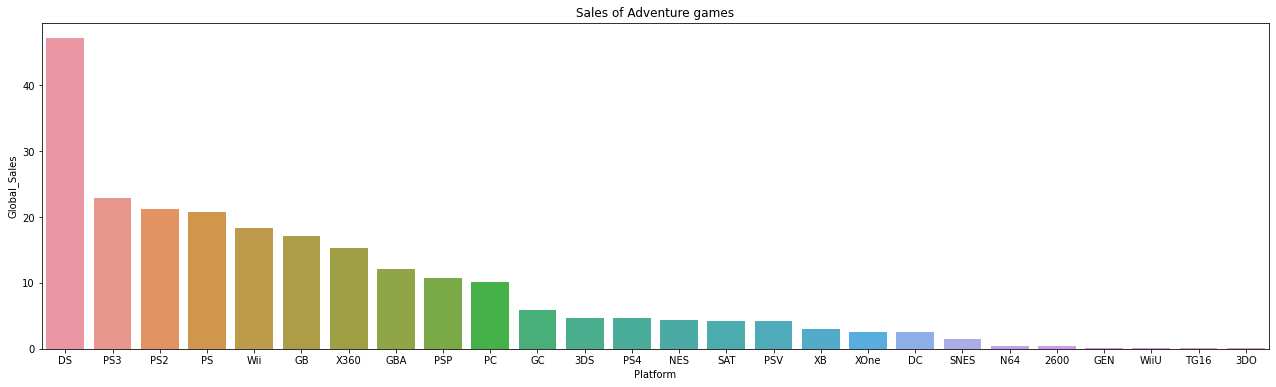

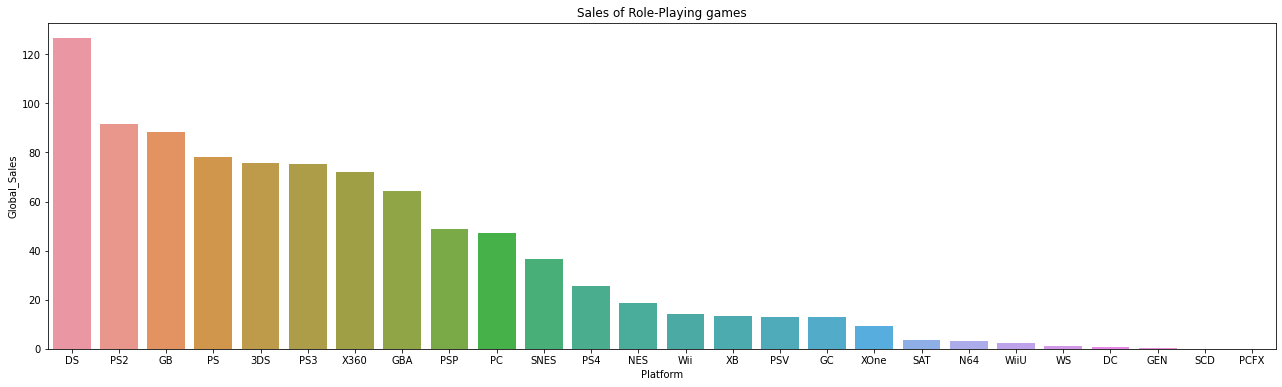

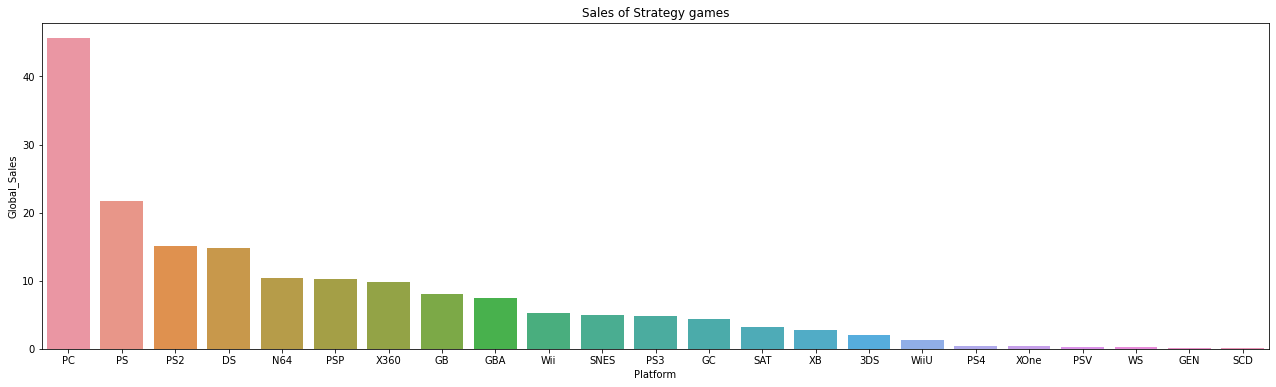

In [41]:
def sales_by_genre(df, genre):
    sales = pd.DataFrame(df[df.Genre == genre].groupby('Platform').Global_Sales.sum())
    sales = sales.sort_values(by=['Global_Sales'], ascending=False)
    plt.figure(figsize=(22, 6))
    sns.barplot(x=sales.index, y=sales.Global_Sales)
    plt.title('Sales of ' + genre + ' games')
    plt.show()

for genre in df.Genre.unique():
    sales_by_genre(df, genre)